# XG Boost

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score,auc
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, FeatureUnion
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.metrics import classification_report
from pandas import Series, DataFrame
import xgboost as xgb
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import datetime
from sklearn.model_selection import RandomizedSearchCV

In [0]:
df_x = pd.read_csv("X_final.csv")
df_x.drop(columns = ["Unnamed: 0"],inplace=True)

In [0]:
df_y = pd.read_csv("Y_final.csv",header=None)

In [0]:
X = df_x.loc[:, df_x.columns != 'isFraud']
X.shape

(41326, 361)

In [0]:
df_y.shape

(41326, 2)

In [0]:
y=df_y[1]
y.shape

(41326,)

In [0]:
# Split the train dataset in test and train such that 30% is test and 70% is train

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features - to have units in same range
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)


#Using xgboost to search for best hyperparameters 
import xgboost as xgb

xgb_boost = xgb.XGBClassifier(random_state=0,objective= 'binary:logistic',eta=0.005,max_depth=20,min_child_weight=0.1,gamma=0.3,colsample_bytree=0.3)
xgb_boost.fit(x_train_std,y_train)

y_pred_test = xgb_boost.predict(x_test_std)

# evaluate predictions
print('ROC_AUC score: %.2f' % roc_auc_score(y_test,xgb_boost.predict_proba(x_test_std)[:, 1]))

ROC_AUC score: 0.95


In [0]:
xgb_boost.fit(sc.transform(X),y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eta=0.005, gamma=0.3,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=0.1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
dftest = pd.read_csv("Test_Final-2.csv")
dftest.drop(columns = ["Unnamed: 0"],inplace=True)
test = dftest.loc[:, dftest.columns != 'isFraud']

In [0]:
# test_enc=labelencoder.transform(test)
test_std = sc.transform(test)
y_pred_test = xgb_boost.predict_proba(test_std)[:,1]

df_submission = pd.DataFrame({'TransactionID':dftest['TransactionID'],'isFraud':y_pred_test})
df_submission.to_csv("Submission8.csv",index=False)

In [0]:
xgb_boost.feature_importances_

array([7.2031823e-04, 9.2545612e-04, 5.2354741e-04, 6.5728405e-04,
       1.3793302e-03, 1.0829404e-03, 1.0341534e-03, 6.9224380e-04,
       8.7890873e-04, 9.9748664e-04, 7.6113729e-04, 6.8895781e-04,
       6.0651661e-04, 7.0538552e-04, 9.1519201e-04, 4.5106304e-04,
       6.5116689e-04, 6.3068111e-04, 2.1483782e-03, 8.7629585e-04,
       9.0198003e-04, 7.8397489e-04, 6.5101852e-04, 1.5982265e-03,
       7.2103704e-04, 4.9472024e-04, 7.5273414e-04, 7.7908713e-04,
       7.3507772e-04, 7.2993321e-04, 5.9926743e-04, 8.5324654e-04,
       1.2010748e-03, 1.0399196e-03, 8.4611075e-04, 5.4612395e-04,
       1.6349487e-03, 1.4595913e-03, 1.6491782e-03, 8.7433989e-04,
       8.4566191e-04, 1.9857266e-03, 1.1584376e-03, 7.1172119e-04,
       9.1295771e-04, 6.7262183e-04, 1.7297131e-03, 5.3246366e-03,
       7.5920584e-04, 1.4654736e-03, 9.4169128e-04, 1.1765931e-03,
       1.4542057e-03, 9.8113855e-04, 1.0880008e-03, 1.7542614e-03,
       1.5714563e-03, 1.0293860e-03, 1.4051209e-03, 0.0000000e

Text(0.5, 1.0, 'Important Features')

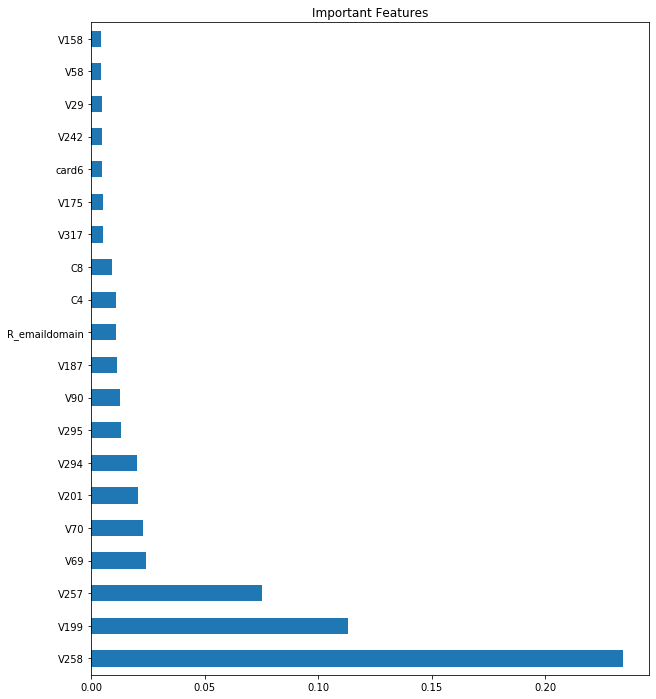

In [0]:
plt.figure(figsize=(10,12))
feat_importances = pd.Series(xgb_boost.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False)[:20].plot(kind='barh')
plt.title("Important Features")